# EDA
- データの特徴などを確認

# ライブラリの読み込み

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
from collections import Counter
import ipadic

import MeCab
import spacy

import re

# データの読み込み

In [2]:
DATA_DIR = "../data/"

train_raw = pd.read_csv(f"{DATA_DIR}raw/train.csv")
train_raw

,id,source,text,label
0,80074aa43,news4vip,まともに相手されてない人との関係なんて\nそんな大事にするものか？,0
1,6378fea6b,livejupiter,最近はアヘアヘQSマンやない？ ｲｲ!(・∀・)+1-0(・Ａ・)ｲｸﾅｲ!,0
2,c535f5613,livejupiter,日本人として生まれても無能な低学歴って分かったら日本人の権利剥奪して追放すべきやろ\n甘えるな,1
3,e76638295,livejupiter,よくよく思えば川上は配布にしたらとんでもなく有能だよな\nガチャから引いたら圧倒的歓喜レベルやで,0
4,51e4036bf,newsplus,押井は原作レイプの専門家だから\n原作マンガの真意を誤解させることに関してはプロだが\nそれ...,0
...,...,...,...,...
5251,42b5f86b0,news4vip,車じゃなくてもよくない？\nケーブル網を張り巡らせてリフトみたいなのを付けるとか,0
5252,402ce15d9,livejupiter,左やぞ？\n出すなら下水流,0
5253,0739a9fcb,newsplus,日本によって、けんけんガクガクの議論を持たらされた韓国は被害者\n\n日本人がしっかり考えな...,0
5254,d496c7dc8,news4vip,ゴムボート買って、沖まで漕いで行ったら？\n魚の血を塗っておけばサメが食べてくれるよ,0


In [3]:
test_raw = pd.read_csv(f"{DATA_DIR}raw/test.csv")
test_raw

,id,source,text
0,001026808,news4vip,上でも言ったけどオタクレベルの知識求めてる訳じゃない\nただ囲碁やります！って人が誰1人プロ...
1,00465ac96,livejupiter,たとえば、黒人なんかは、生物学的欠陥はないのに、文化的要因で、悪循環に陥り、実力をつけられず...
2,004674725,livejupiter,そうなんやろなあ色々と勿体ない感じしたわ\n終わり方と黒幕キャラは好きやったで\n\nちなワ...
3,00474460f,news4vip,法的というか自治体ごとにバラバラの条例で定めてるだけだからな\n普通の淫行条例だと「青少年に...
4,004a7525c,newsplus,別のジャーナリストの感想として言われてるので客観的な事実とは言えないけど、\n現地は不測の事...
...,...,...,...
3218,ffc4647ac,news4vip,１人がいいのか？\nなんで変なのと同棲したのか…\nなにがしたいんだ…
3219,ffc6554ba,newsplus,ロシアもだなあ\n元々北朝鮮はロシアの工作で作られた国だから
3220,ffd3b29c2,newsplus,クネが国境に拡声器を設置して昼も夜も北の悪口鳴らしてんだとよ\nお互い当たらないように大砲撃...
3221,ffd3c69b6,news4vip,当然って言い方が腹立つんだよなあ\r\nその時点で何か男より優位に立ちたいみたいな感じがして...


In [4]:
sub_sample = pd.read_csv(f"{DATA_DIR}raw/sample_submission.csv")
sub_sample

,id,label
0,001026808,0
1,00465ac96,0
2,004674725,0
3,00474460f,0
4,004a7525c,0
...,...,...
3218,ffc4647ac,0
3219,ffc6554ba,0
3220,ffd3b29c2,0
3221,ffd3c69b6,0


In [5]:
print(pd.read_excel(f"{DATA_DIR}raw/data_explanation.xlsx", sheet_name=None).keys())
data_exp = pd.read_excel(f"{DATA_DIR}raw/data_explanation.xlsx", sheet_name="カラム説明")
data_exp

dict_keys(['ファイル説明', 'カラム説明'])


,カラム名,内容
0,id,一意のid
1,source,おーぷん2ちゃんねる対話コーパスでクロールされた掲示板(「なんでも実況(ジュピター)(liv...
2,text,投稿テキスト
3,label,0:ヘイトスピーチではない。1:ヘイトスピーチ


# trainデータ

In [6]:
train = train_raw

In [7]:
train.isnull().sum()

id        0
source    0
text      0
label     0
dtype: int64

In [8]:
train.describe(include="all")

,id,source,text,label
count,5256,5256,5256,5256.000000
unique,5256,3,5256,NaN
top,80074aa43,newsplus,まともに相手されてない人との関係なんて\nそんな大事にするものか？,NaN
freq,1,1967,1,NaN
mean,NaN,NaN,NaN,0.058219
std,NaN,NaN,NaN,0.234180
min,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,0.000000


## ラベル数確認

In [9]:
train["label"].value_counts()

0    4950
1     306
Name: label, dtype: int64

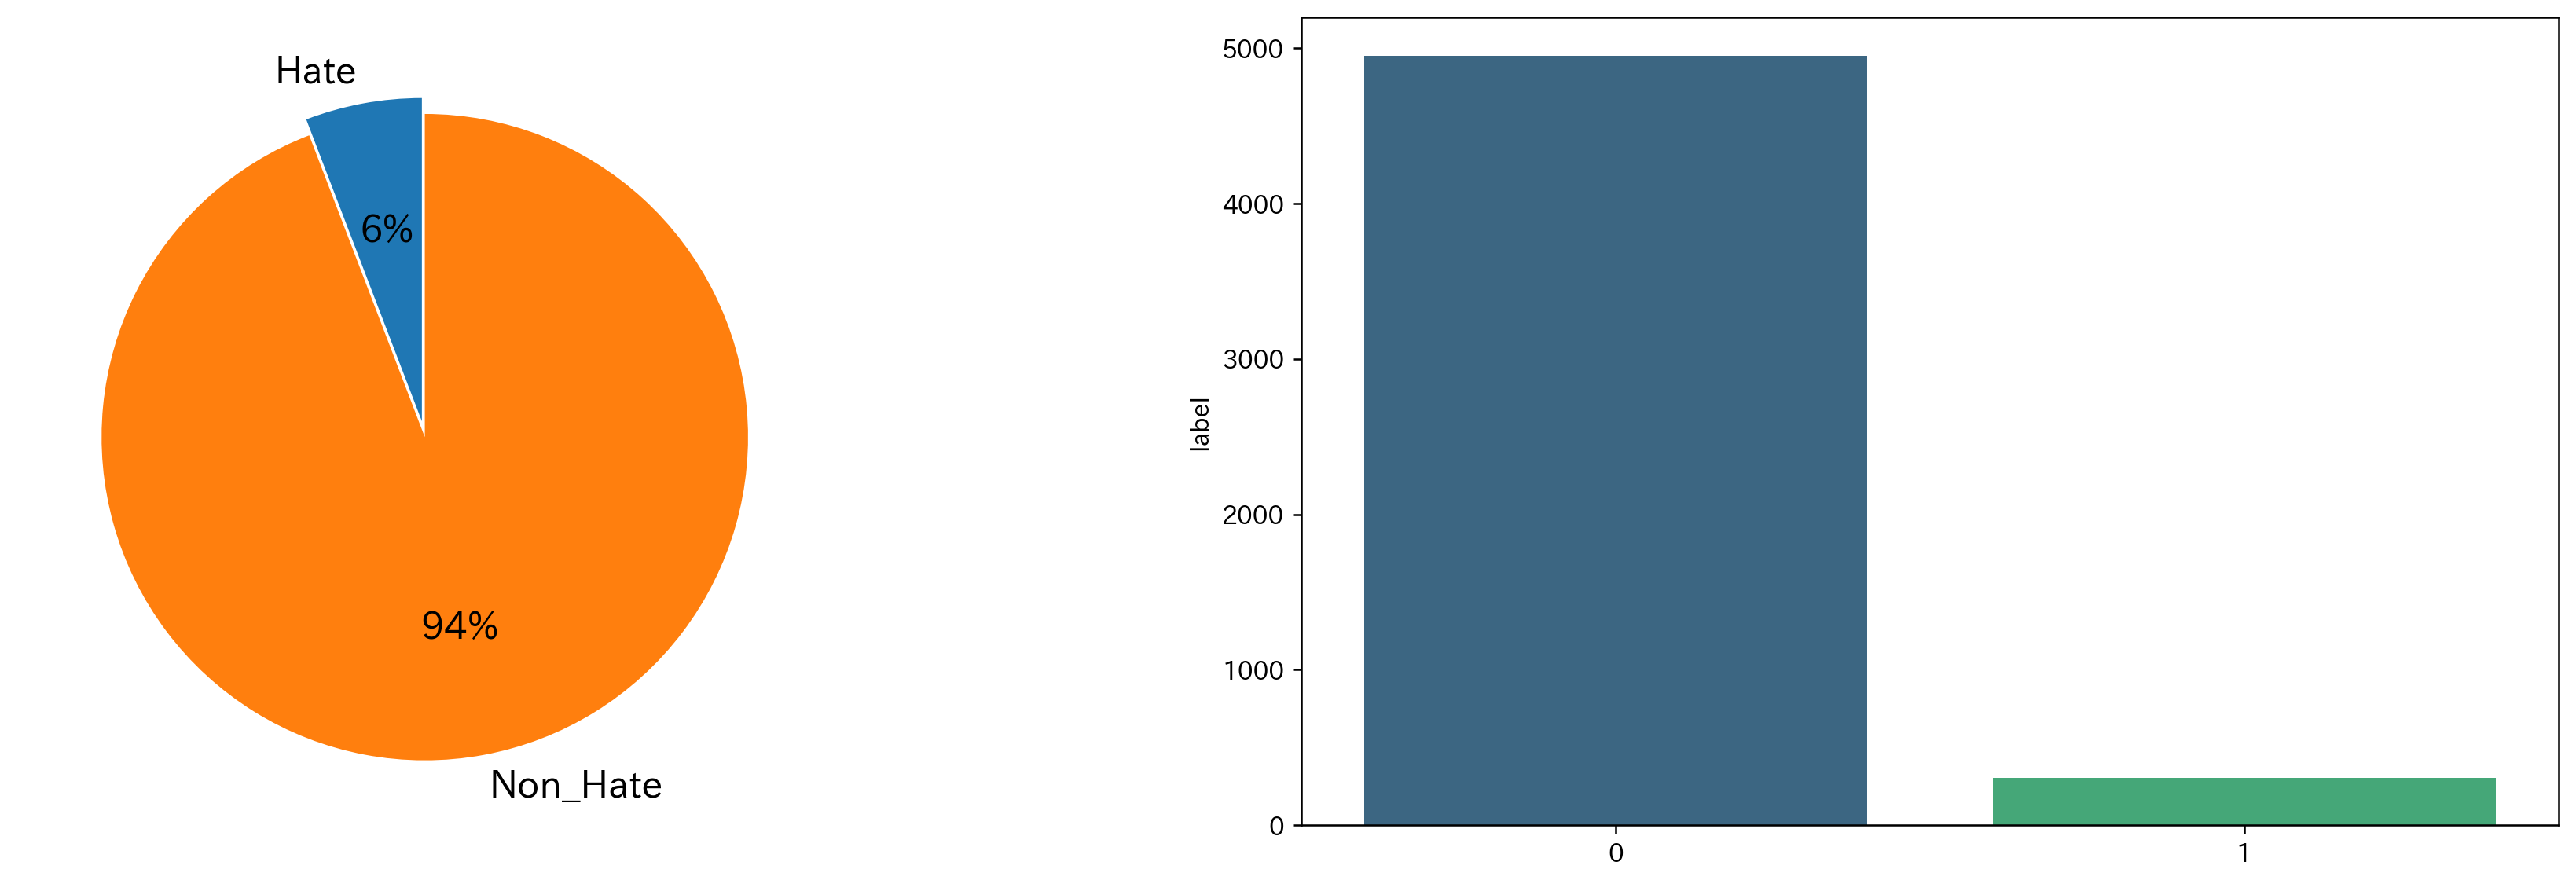

In [10]:
labels = ["Hate", "Non_Hate"]
sizes = [306, 4950]

plt.figure(figsize=(20, 6), dpi=227)
plt.subplot(1, 2, 1)
plt.pie(sizes, labels=labels, textprops={"fontsize": 15}, startangle=90, autopct="%1.0f%%",explode=[0, 0.05])
plt.subplot(1, 2, 2)
sns.barplot(x=train["label"].unique(), y=train["label"].value_counts(), palette="viridis")
plt.show()

## ソース元確認

In [11]:
train["source"].value_counts()

newsplus       1967
news4vip       1849
livejupiter    1440
Name: source, dtype: int64

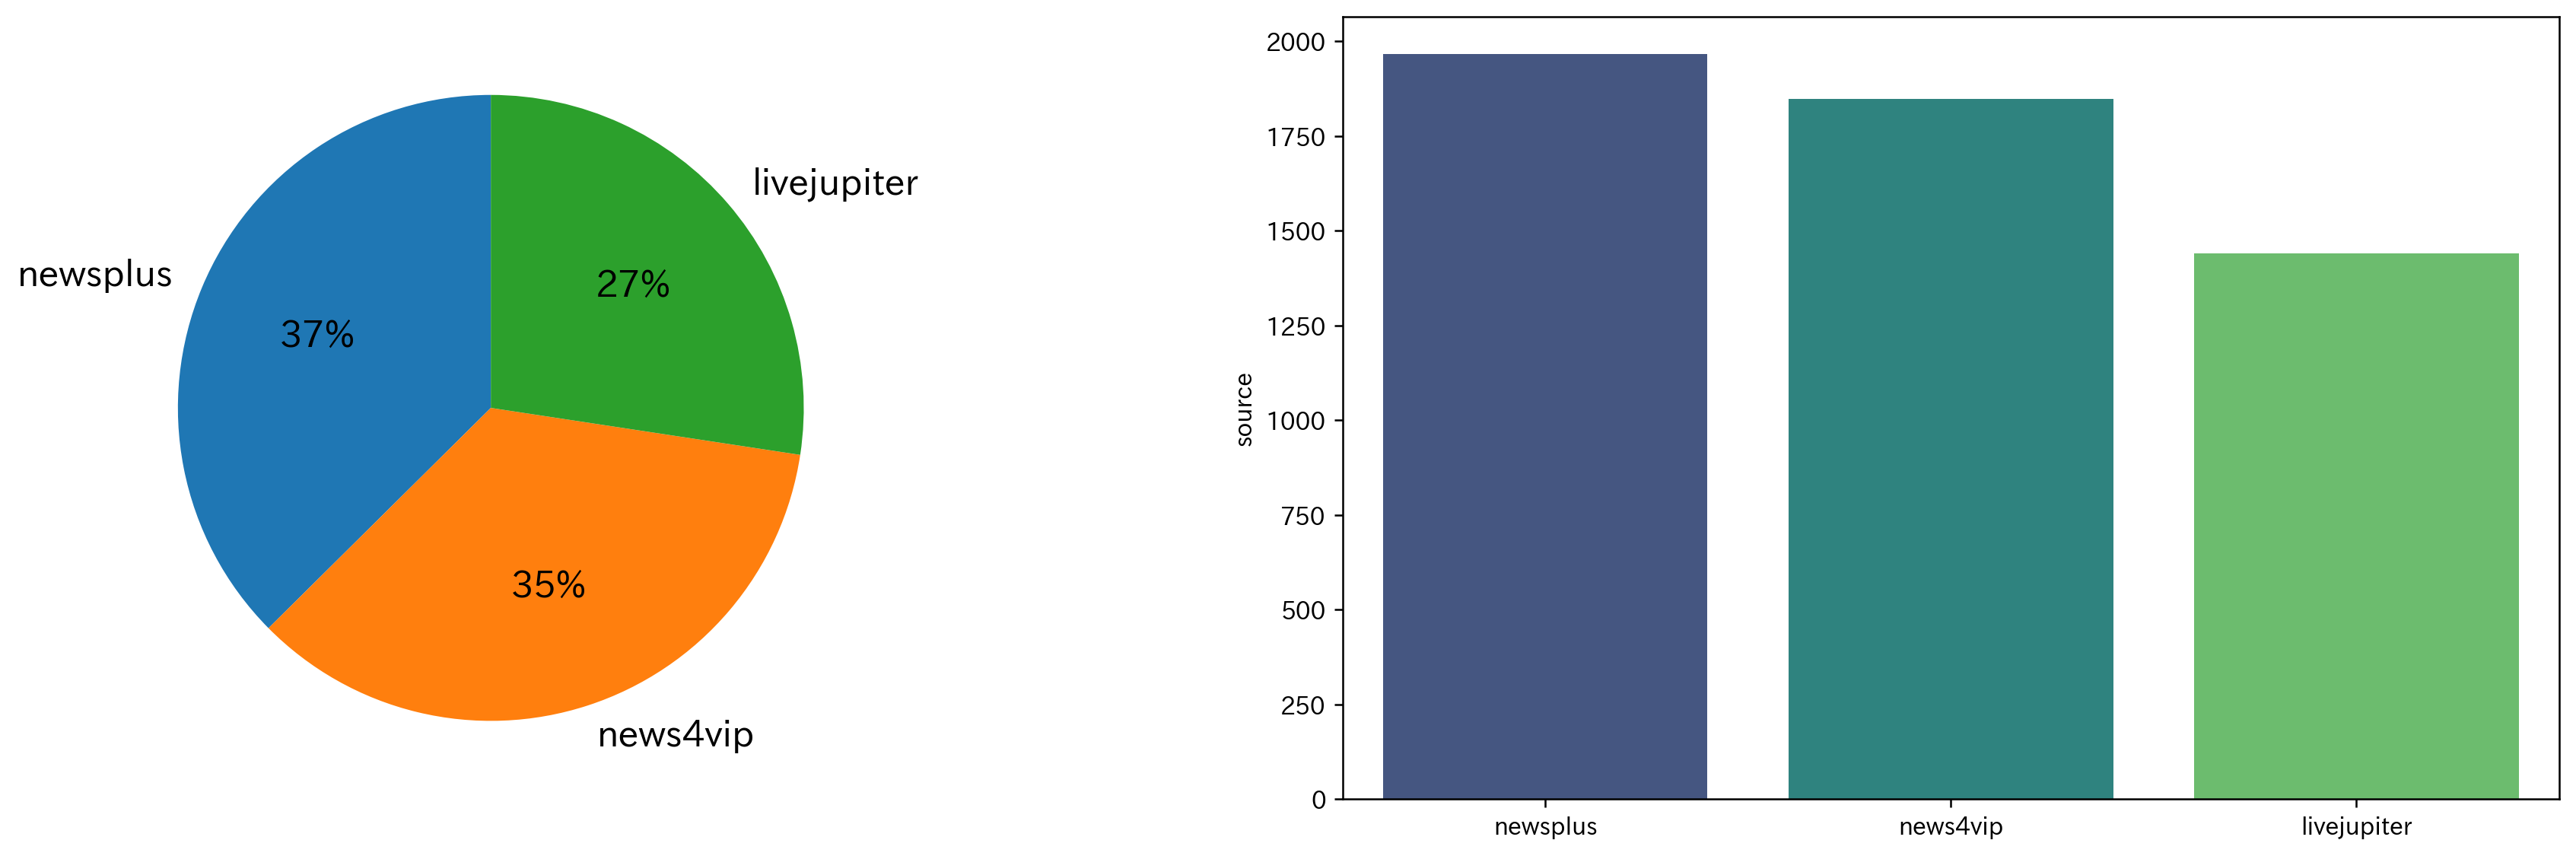

In [12]:
labels = ["newsplus", "news4vip", "livejupiter"]
sizes = [1967, 1849, 1440]

plt.figure(figsize=(20, 6), dpi=227)
plt.subplot(1, 2, 1)
plt.pie(sizes, labels=labels, textprops={"fontsize": 15}, startangle=90, autopct="%1.0f%%")
plt.subplot(1, 2, 2)
sns.barplot(x=labels, y=train["source"].value_counts(), palette="viridis")
plt.show()

## 改行文字等削除

In [13]:
new_text = []
char_num = []

for line in train["text"]:
    line = line.strip("\n")
    line = line.replace("\n", "")
    line = line.rstrip("\u3000")
    line = line.replace("\u3000", "")
    
    # 半角全角英数字除去
    line = re.sub(r'[0-9０-９a-zA-Zａ-ｚＡ-Ｚ]+', " ", line)
    # 記号もろもろ除去
    line = re.sub(r'[\．_－―─！＠＃＄％＾＆\-‐|\\＊\“（）＿■×+α※÷⇒—●★☆〇◎◆▼◇△□(：〜～＋=)／*&^%$#@!~`){}［］…\[\]\"\'\”\’:;<>?＜＞〔〕〈〉？、。・,\./『』【】「」→←○《》≪≫\n\u3000]+', "", line)
    
    new_text.append(line)
    char_num.append(len(line))

In [14]:
train["text"] = new_text
train["char_num"] = char_num

train.head()

,id,source,text,label,char_num
0,80074aa43,news4vip,まともに相手されてない人との関係なんてそんな大事にするものか,0,30
1,6378fea6b,livejupiter,最近はアヘアヘ マンやない ｲｲ∀ ｲｸﾅｲ,0,24
2,c535f5613,livejupiter,日本人として生まれても無能な低学歴って分かったら日本人の権利剥奪して追放すべきやろ甘えるな,1,45
3,e76638295,livejupiter,よくよく思えば川上は配布にしたらとんでもなく有能だよなガチャから引いたら圧倒的歓喜レベルやで,0,46
4,51e4036bf,newsplus,押井は原作レイプの専門家だから原作マンガの真意を誤解させることに関してはプロだがそれ以外には...,0,54


### ヒストグラム（文字数、label）

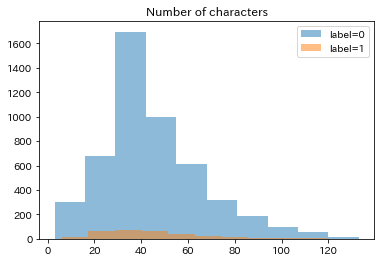

In [15]:
plt.hist(train[train["label"]==0]["char_num"], alpha = 0.5, label="label=0")
plt.hist(train[train["label"]==1]["char_num"], alpha = 0.5, label="label=1")
plt.legend(loc="upper right")
plt.title("Number of characters")

plt.show()

## 分かち書き（MeCab）

In [16]:
m = MeCab.Tagger("-Owakati")

text_owakachi = []
for line in train["text"]:
    splited_line = m.parse(line)    
    text_owakachi.append(splited_line)

In [17]:
train["text_owakachi"] = text_owakachi

train["word_num"] = train["text_owakachi"].apply(lambda x: len(x.split()))

train.head()

,id,source,text,label,char_num,text_owakachi,word_num
0,80074aa43,news4vip,まともに相手されてない人との関係なんてそんな大事にするものか,0,30,まとも に 相手 さ れ て ない 人 と の 関係 なんて そんな 大事 に する もの ...,18
1,6378fea6b,livejupiter,最近はアヘアヘ マンやない ｲｲ∀ ｲｸﾅｲ,0,24,最近 は アヘアヘ マン や ない ｲｲ ∀ ｲｸﾅｲ \n,9
2,c535f5613,livejupiter,日本人として生まれても無能な低学歴って分かったら日本人の権利剥奪して追放すべきやろ甘えるな,1,45,日本 人 と し て 生まれ て も 無能 な 低 学歴 って 分かっ たら 日本 人 の ...,28
3,e76638295,livejupiter,よくよく思えば川上は配布にしたらとんでもなく有能だよなガチャから引いたら圧倒的歓喜レベルやで,0,46,よくよく 思え ば 川上 は 配布 に し たら とんでも なく 有能 だ よ な ガチャ ...,25
4,51e4036bf,newsplus,押井は原作レイプの専門家だから原作マンガの真意を誤解させることに関してはプロだがそれ以外には...,0,54,押井 は 原作 レイプ の 専門 家 だ から 原作 マンガ の 真意 を 誤解 さ せる ...,34


### ヒストグラム（品詞数、label）

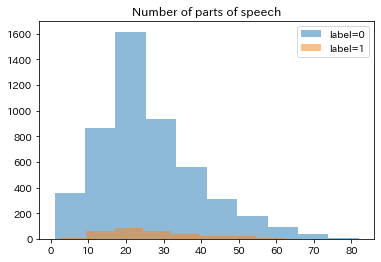

In [18]:
plt.hist(train[train["label"]==0]["word_num"], alpha = 0.5, label="label=0")
plt.hist(train[train["label"]==1]["word_num"], alpha = 0.5, label="label=1")
plt.legend(loc="upper right")
plt.title("Number of parts of speech")

plt.show()

## 形態素解析（spaCy/GiNZA）
- [参考サイト（第4回 spaCy/GiNZA を用いた自然言語処理）](https://www.ogis-ri.co.jp/otc/hiroba/technical/similar-document-search/part4.html)

In [19]:
nlp = spacy.load("ja_ginza")

In [20]:
# 挙動確認（noun_chunks）
doc = nlp(train["text"][0])

print(doc)

for np in doc.noun_chunks:
    print(np)

まともに相手されてない人との関係なんてそんな大事にするものか
まともに相手されてない人
関係
そんな
大事にするもの


In [21]:
# 挙動確認（品詞分解等）
for token in doc:
    print("token[%2d] = %-10s, pos:%-6s, dep:%-10s, head=%d" % (token.i, token.text, token.pos_, token.dep_, token.head.i))

token[ 0] = まとも       , pos:ADJ   , dep:advcl     , head=2
token[ 1] = に         , pos:AUX   , dep:aux       , head=0
token[ 2] = 相手        , pos:NOUN  , dep:acl       , head=7
token[ 3] = さ         , pos:AUX   , dep:aux       , head=2
token[ 4] = れ         , pos:AUX   , dep:aux       , head=2
token[ 5] = て         , pos:AUX   , dep:aux       , head=2
token[ 6] = ない        , pos:AUX   , dep:aux       , head=2
token[ 7] = 人         , pos:NOUN  , dep:nmod      , head=10
token[ 8] = と         , pos:ADP   , dep:case      , head=7
token[ 9] = の         , pos:ADP   , dep:case      , head=7
token[10] = 関係        , pos:NOUN  , dep:obl       , head=15
token[11] = なんて       , pos:ADP   , dep:case      , head=10
token[12] = そんな       , pos:PRON  , dep:obl       , head=15
token[13] = 大事        , pos:ADJ   , dep:advcl     , head=15
token[14] = に         , pos:AUX   , dep:aux       , head=13
token[15] = する        , pos:VERB  , dep:acl       , head=16
token[16] = もの        , pos:NOUN  , dep:ROOT     

In [22]:
# 挙動確認（品詞の依存関係）
from spacy import displacy
displacy.render(doc, style="dep", options={"compact":True})

In [23]:
# 名詞数を入れるリスト
all_noun_count = []

for sentence in train["text"]:
    doc = nlp(sentence)

    # 一文の名詞数を入れるリスト
    noun_count = []

    for token in doc:
        if token.pos_ == "NOUN":
            noun_count.append(token.text)
    all_noun_count.append(len(noun_count))

In [24]:
train["noun_num"] = all_noun_count
train.head(3)

,id,source,text,label,char_num,text_owakachi,word_num,noun_num
0,80074aa43,news4vip,まともに相手されてない人との関係なんてそんな大事にするものか,0,30,まとも に 相手 さ れ て ない 人 と の 関係 なんて そんな 大事 に する もの ...,18,4
1,6378fea6b,livejupiter,最近はアヘアヘ マンやない ｲｲ∀ ｲｸﾅｲ,0,24,最近 は アヘアヘ マン や ない ｲｲ ∀ ｲｸﾅｲ \n,9,3
2,c535f5613,livejupiter,日本人として生まれても無能な低学歴って分かったら日本人の権利剥奪して追放すべきやろ甘えるな,1,45,日本 人 と し て 生まれ て も 無能 な 低 学歴 って 分かっ たら 日本 人 の ...,28,5


### ヒストグラム（名詞数、label）

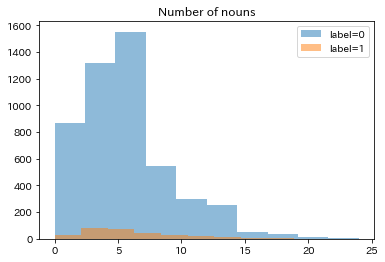

In [25]:
plt.hist(train[train["label"]==0]["noun_num"], alpha = 0.5, label="label=0")
plt.hist(train[train["label"]==1]["noun_num"], alpha = 0.5, label="label=1")
plt.legend(loc="upper right")
plt.title("Number of nouns")

plt.show()

### 頻出名詞ランキング

#### ヘイト文

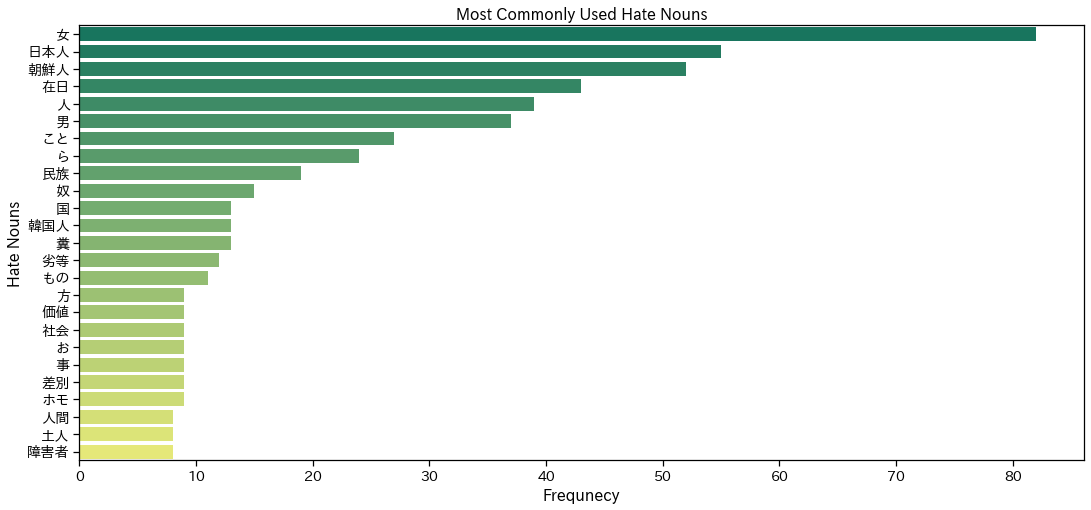

In [26]:
all_hate_noun = []

for sentence in train[train["label"] == 1]["text"]:
    doc = nlp(sentence)
    for token in doc:
        if token.pos_ == "NOUN":
            all_hate_noun.append(token.text)

df = pd.DataFrame(Counter(all_hate_noun).most_common(25), columns= ['Noun', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df['Noun'], x= df['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Hate Nouns")
plt.xlabel("Frequnecy")
plt.ylabel("Hate Nouns")
plt.show()

#### 非ヘイト文

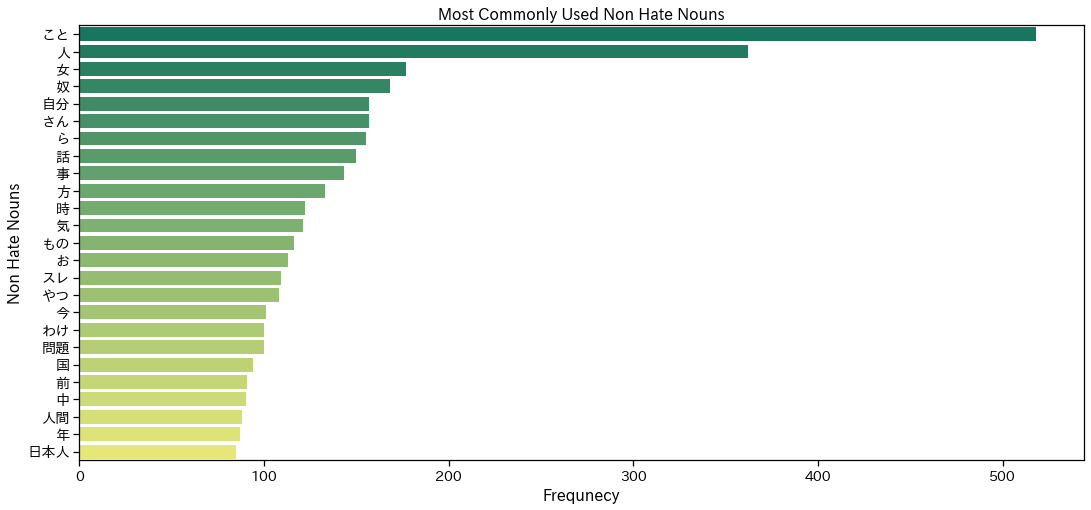

In [27]:
all_non_hate_noun = []


for sentence in train[train["label"] == 0]["text"]:
    doc = nlp(sentence)
    for token in doc:
        if token.pos_ == "NOUN":
            all_non_hate_noun.append(token.text)
    
df = pd.DataFrame(Counter(all_non_hate_noun).most_common(25), columns= ['Noun', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df['Noun'], x= df['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Non Hate Nouns")
plt.xlabel("Frequnecy")
plt.ylabel("Non Hate Nouns")
plt.show()